In [1]:
import pandas as pd # load and manipulate data and for One-Hot Encoding
import numpy as np # calculate the mean and standard deviation
import matplotlib.pyplot as plt # drawing graphs
from sklearn.tree import DecisionTreeClassifier # a classification tree
from sklearn.tree import plot_tree # draw a classification tree
from sklearn.model_selection import train_test_split # split  data into training and testing sets
from sklearn.model_selection import cross_val_score # cross validation
from sklearn.metrics import confusion_matrix # creates a confusion matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


df=pd.read_csv("/content/zoo_data.csv",header=None)




df[16].unique()



array([1, 4, 2, 7, 6, 5, 3])

In [2]:
y=df[16].copy()
y.head()


0    1
1    1
2    4
3    1
4    1
Name: 16, dtype: int64

In [3]:
X=df.drop(16, axis=1).copy()
X.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [4]:
df[12].unique()


array([4, 0, 2, 6, 8, 5])

In [5]:
pd.get_dummies(X, columns=[12]).head()



,0,1,2,3,4,5,6,7,8,9,10,11,13,14,15,12_0,12_2,12_4,12_5,12_6,12_8
0,1,0,0,1,0,0,1,1,1,1,0,0,0,0,1,0,0,1,0,0,0
1,1,0,0,1,0,0,0,1,1,1,0,0,1,0,1,0,0,1,0,0,0
2,0,0,1,0,0,1,1,1,1,0,0,1,1,0,0,1,0,0,0,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,0,0,1,0,0,1,0,0,0
4,1,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,1,0,0,0


In [6]:
X_encoded=pd.get_dummies(X, columns=[12])


In [7]:
y.unique()

array([1, 4, 2, 7, 6, 5, 3])

In [8]:
for i in range(len(y)):
    if y[i] <= 4:
        y[i]=0
    else:
        y[i]=1

y.unique()    



array([0, 1])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)



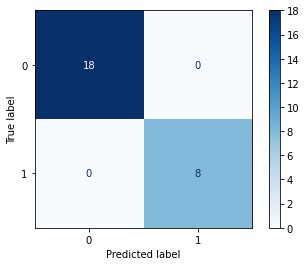

In [10]:
plot_confusion_matrix(clf_dt, X_test, y_test,cmap=plt.cm.Blues, display_labels=["0", "1"])


[Text(251.10000000000002, 373.72499999999997, '8 <= 0.5\ngini = 0.304\nsamples = 75\nvalue = [61, 14]\nclass = No'),
 Text(167.4, 305.775, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]\nclass = Yes'),
 Text(334.8, 305.775, '13 <= 0.5\ngini = 0.061\nsamples = 63\nvalue = [61, 2]\nclass = No'),
 Text(167.4, 237.825, '0 <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = No'),
 Text(83.7, 169.87499999999997, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Yes'),
 Text(251.10000000000002, 169.87499999999997, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = No'),
 Text(502.20000000000005, 237.825, '5 <= 0.5\ngini = 0.034\nsamples = 57\nvalue = [56, 1]\nclass = No'),
 Text(418.5, 169.87499999999997, 'gini = 0.0\nsamples = 37\nvalue = [37, 0]\nclass = No'),
 Text(585.9, 169.87499999999997, '12 <= 3.0\ngini = 0.095\nsamples = 20\nvalue = [19, 1]\nclass = No'),
 Text(502.20000000000005, 101.92499999999995, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]\nclass = No'),
 Text(669.6, 101.9249999

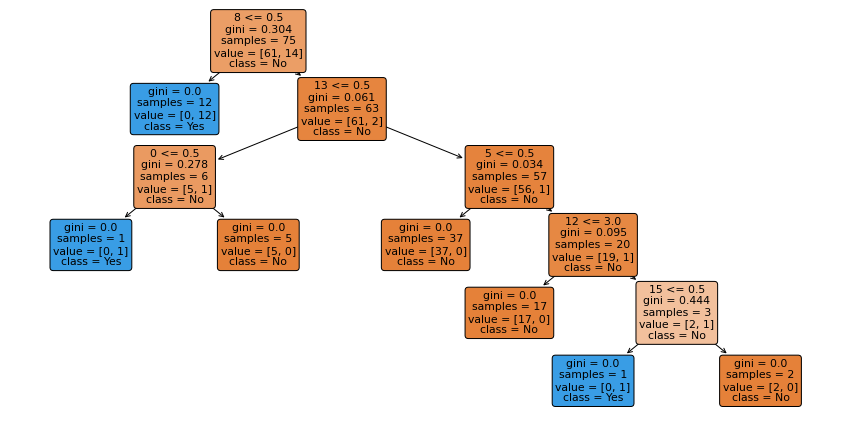

In [11]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt, 
          filled=True, 
          rounded=True, 
          class_names=["No", "Yes"], 
          feature_names=X.columns)
